# Extract Decennial Census Data

In [5]:
import requests
import pandas as pd

In [43]:
def base_url_func(year = "2000", dataset = "dec/sf1"):
    # Census API host name
    HOST = "https://api.census.gov/data"
    base_url = "/".join([HOST, year, dataset])
    
    return base_url

base_url = base_url_func()
print(f"Census Gov Data Base URL: {base_url}")

Census Gov Data Base URL: https://api.census.gov/data/2000/dec/sf1


In [44]:
# Specify Census variables and other predicates
get_vars = ["NAME", "P001001"]
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "county:*"
predicates["in"] = "state:02"

# Execute the request, examine text of response object
r = requests.get(base_url, params=predicates)

##### https://census.missouri.edu/geocodes/

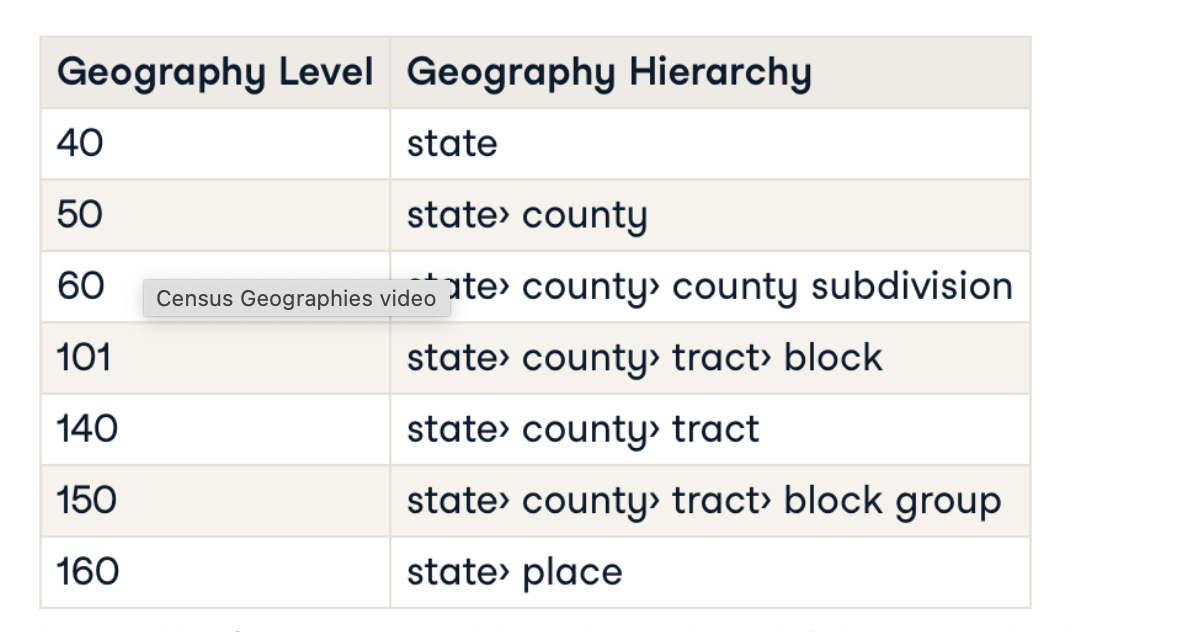

In [48]:
r.text

'[["NAME","P001001","state","county"],\n["Aleutians East Borough, Alaska","2697","02","013"],\n["Aleutians West Census Area, Alaska","5465","02","016"],\n["Anchorage Municipality, Alaska","260283","02","020"],\n["Bethel Census Area, Alaska","16006","02","050"],\n["Bristol Bay Borough, Alaska","1258","02","060"],\n["Denali Borough, Alaska","1893","02","068"],\n["Dillingham Census Area, Alaska","4922","02","070"],\n["Fairbanks North Star Borough, Alaska","82840","02","090"],\n["Haines Borough, Alaska","2392","02","100"],\n["Juneau City and Borough, Alaska","30711","02","110"],\n["Kenai Peninsula Borough, Alaska","49691","02","122"],\n["Ketchikan Gateway Borough, Alaska","14070","02","130"],\n["Kodiak Island Borough, Alaska","13913","02","150"],\n["Lake and Peninsula Borough, Alaska","1823","02","164"],\n["Matanuska-Susitna Borough, Alaska","59322","02","170"],\n["Nome Census Area, Alaska","9196","02","180"],\n["North Slope Borough, Alaska","7385","02","185"],\n["Northwest Arctic Borough,

In [49]:
population_df = pd.DataFrame(data = r.json()[1:], columns = ["NAME", "POPULATION", "STATE_CODE","COUNTY"])

In [50]:
population_df

,NAME,POPULATION,STATE_CODE,COUNTY
0,"Aleutians East Borough, Alaska",2697,02,013
1,"Aleutians West Census Area, Alaska",5465,02,016
2,"Anchorage Municipality, Alaska",260283,02,020
3,"Bethel Census Area, Alaska",16006,02,050
4,"Bristol Bay Borough, Alaska",1258,02,060
5,"Denali Borough, Alaska",1893,02,068
6,"Dillingham Census Area, Alaska",4922,02,070
7,"Fairbanks North Star Borough, Alaska",82840,02,090
8,"Haines Borough, Alaska",2392,02,100
9,"Juneau City and Borough, Alaska",30711,02,110


# Census - 2020 DataSet - Demographics

In [6]:
def base_url_func(year = "2010", dataset = "dec/sf1"):
    # Census API host name
    HOST = "https://api.census.gov/data"
    base_url = "/".join([HOST, year, dataset])
    
    return base_url

base_url = base_url_func(year = "2020", dataset = "dec/dp")
print(f"Census Gov Data Base URL: {base_url}")

Census Gov Data Base URL: https://api.census.gov/data/2020/dec/dp


In [7]:
def three_decimel_integer(integ:int) -> int:
    if len(str(integ)) == 1:
        return "00"+str(integ)
    elif len(str(integ))==2:
        return "0"+str(integ)
    elif len(str(integ)) ==3:
        return str(integ) 

count_fields_list = [f"DP1_0{three_decimel_integer(i)}C" for i in range(1, 161)]

In [8]:
# Initialize an empty DataFrame to store the combined results
combined_df = pd.DataFrame()

for i in range(0, len(count_fields_list), 40):
    get_vars = ["NAME"] + count_fields_list[i:i+40]
    predicates = {}
    predicates["get"] = ",".join(get_vars)
    predicates["for"] = "county:*"
    predicates["in"] = "state:02"
    predicates["key"] = "1e4b8c1715da9e2f6f845ff970bcec86e22efd86"

    # Execute the request and check response status
    r = requests.get(base_url, params=predicates)
    print(f"Status Code: {r.status_code}")

    # If the request is successful, process the data
    if r.status_code == 200:
        # Create a DataFrame from the JSON response
        data = pd.DataFrame(data=r.json()[1:], columns=['NAME'] + count_fields_list[i:i+40] + ['state', 'county'])
        
        # Merge with the combined DataFrame based on 'NAME', 'state', and 'county'
        if combined_df.empty:
            combined_df = data
        else:
            combined_df = pd.merge(combined_df, data, on=['NAME', 'state', 'county'], how='outer')

# Display the combined DataFrame
print(combined_df)

Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
                                         NAME DP1_0001C DP1_0002C DP1_0003C  \
0              Aleutians East Borough, Alaska      3420        70        72   
1          Aleutians West Census Area, Alaska      5232       162       208   
2              Anchorage Municipality, Alaska    291247     18738     19261   
3                  Bethel Census Area, Alaska     18666      1794      1916   
4                 Bristol Bay Borough, Alaska       844        45        62   
5                 Chugach Census Area, Alaska      7102       443       474   
6            Copper River Census Area, Alaska      2617       137       161   
7                      Denali Borough, Alaska      1619        89        81   
8              Dillingham Census Area, Alaska      4857       434       434   
9        Fairbanks North Star Borough, Alaska     95655      6697      6581   
10                     Haines Borough, Alaska      2080        

In [9]:
data.to_csv("Demographics_2022.csv")

# Economics Statistics - 2022

In [43]:
def base_url_func(year = "2010", dataset = "dec/sf1"):
    # Census API host name
    HOST = "https://api.census.gov/data"
    base_url = "/".join([HOST, year, dataset])
    
    return base_url

base_url = base_url_func(year = "2022", dataset = "ecnbasic")
print(f"Census Gov Data Base URL: {base_url}")

Census Gov Data Base URL: https://api.census.gov/data/2022/ecnbasic


In [26]:
variable_dict = pd.read_html("https://api.census.gov/data/2022/ecnbasic/variables.html")[0]

In [96]:
count_field_list = variable_dict[(variable_dict["Required"]== "not required") & (variable_dict['Attributes'].notnull())]["Name"].tolist()

In [98]:
get_vars = ['NAME', 'EMP','NAICS2022', 'NAICS2022_LABEL',"HOURS"]
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "us:*"
predicates["key"] = "1e4b8c1715da9e2f6f845ff970bcec86e22efd86"

r = requests.get(base_url, params=predicates)

In [99]:
r.text

'[["NAME","EMP","NAICS2022","NAICS2022_LABEL","HOURS","us"],\n["United States","324359","115","Support activities for agriculture and forestry","0","1"],\n["United States","565193","21","Mining, quarrying, and oil and gas extraction","916781","1"],\n["United States","104788","211","Oil and gas extraction","125559","1"],\n["United States","173447","212","Mining (except oil and gas)","314940","1"],\n["United States","286958","213","Support activities for mining","476282","1"],\n["United States","676197","22","Utilities","0","1"],\n["United States","676197","221","Utilities","0","1"],\n["United States","7606446","23","Construction","11103261","1"],\n["United States","1631357","236","Construction of buildings","2020144","1"],\n["United States","1036688","237","Heavy and civil engineering construction","1715247","1"],\n["United States","4938401","238","Specialty trade contractors","7367870","1"],\n["United States","12260726","31-33","Manufacturing","16941617","1"],\n["United States","165884

In [100]:
pd.DataFrame(r.json()[1:], columns=get_vars+["us"])

,NAME,EMP,NAICS2022,NAICS2022_LABEL,HOURS,us
0,United States,324359,115,Support activities for agriculture and forestry,0,1
1,United States,565193,21,"Mining, quarrying, and oil and gas extraction",916781,1
2,United States,104788,211,Oil and gas extraction,125559,1
3,United States,173447,212,Mining (except oil and gas),314940,1
4,United States,286958,213,Support activities for mining,476282,1
...,...,...,...,...,...,...
93,United States,12266903,722,Food services and drinking places,0,1
94,United States,3997373,81,Other services (except public administration),0,1
95,United States,1453795,811,Repair and maintenance,0,1
96,United States,1579123,812,Personal and laundry services,0,1


In [97]:
# Initialize an empty DataFrame to store the combined results
combined_df = pd.DataFrame()

for i in range(0, len(count_fields_list), 40):
    get_vars = count_fields_list[i:i+40]
    predicates = {}
    predicates["get"] = ",".join(get_vars)
    predicates["for"] = "us:*"
    predicates["key"] = "1e4b8c1715da9e2f6f845ff970bcec86e22efd86"

    # Execute the request and check response status
    r = requests.get(base_url, params=predicates)
    print(f"Status Code: {r.status_code}")

    # If the request is successful, process the data
    if r.status_code == 200:
        # Create a DataFrame from the JSON response
        data = pd.DataFrame(data=r.json()[1:], columns=['NAME'] + count_fields_list[i:i+40] + ['state', 'county'])
        
        # Merge with the combined DataFrame based on 'NAME', 'state', and 'county'
        if combined_df.empty:
            combined_df = data
        else:
            combined_df = pd.merge(combined_df, data, on=['NAME', 'state', 'county'], how='outer')

# Display the combined DataFrame
print(combined_df)

Status Code: 400
Status Code: 400
Status Code: 400
Status Code: 400
Empty DataFrame
Columns: []
Index: []
